# Sentiment Analysis with Natural Language Processing

### 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### 2: Create or Load Dataset

In [2]:
df = pd.read_csv("Reviews.csv")
df.head()

,S.No,Review Text,Sentiment
0,1,I love this product! It works so well.,positive
1,2,"Terrible service, I will never buy again.",negative
2,3,Absolutely amazing experience!,positive
3,4,Worst purchase I've made.,negative
4,5,Really happy with the quality.,positive


### 3: Text Preprocessing Function

In [3]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned Review'] = df['Review Text'].apply(preprocess_text)
df.head()

,S.No,Review Text,Sentiment,Cleaned Review
0,1,I love this product! It works so well.,positive,i love this product it works so well
1,2,"Terrible service, I will never buy again.",negative,terrible service i will never buy again
2,3,Absolutely amazing experience!,positive,absolutely amazing experience
3,4,Worst purchase I've made.,negative,worst purchase ive made
4,5,Really happy with the quality.,positive,really happy with the quality


### 4: TF-IDF Vectorization

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Cleaned Review'])

# Target variable
y = df['Sentiment'].map({'positive': 1, 'negative': 0})

### 5: Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6: Model Training - Logistic Regression

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 7: Model Evaluation

In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

Accuracy:  0.25
Precision: 0.25
Recall:    1.00
F1-Score:  0.40


### 8: Confusion Matrix Visualization

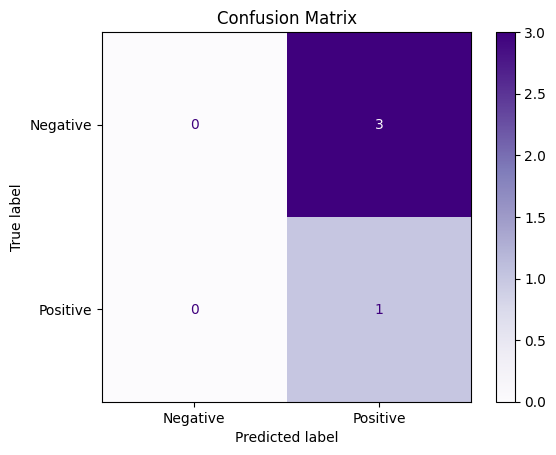

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

### 9: Inspect Predictions

In [9]:
df_test = df.iloc[y_test.index]
df_test = df_test.copy()
df_test['Predicted'] = y_pred
df_test['Predicted'] = df_test['Predicted'].map({1: 'positive', 0: 'negative'})
df_test[['Review Text', 'Sentiment', 'Predicted']]

,Review Text,Sentiment,Predicted
0,I love this product! It works so well.,positive,positive
17,"It’s okay, nothing special.",negative,positive
15,Rude customer service.,negative,positive
1,"Terrible service, I will never buy again.",negative,positive
